In [1]:
import pandas as pd
from carga_datos import  columnas_ndvi
import matplotlib.pyplot as plt
import numpy as np
import ftfy
import geopandas as gpd
import json

green_spaces_data cargada


Cargar BDD

In [2]:
df_summer = pd.read_csv("green_spaces_data/summerNDVI_corregido.csv",  encoding='utf-8')
df_winter = pd.read_csv("green_spaces_data/winterNDVI_corregido.csv",  encoding='utf-8')

Seleccionar Region de Vaplaraíso

In [4]:
df_summer_valparaiso = df_summer.loc[df_summer["NOM_REG"] == "Valparaíso"]
df_winter_valparaiso = df_winter.loc[df_winter["NOM_REG"] == "Valparaíso"]

# Imprimir DataFrame de verano
#print("Summer DataFrame Región de Valparaíso:")
#print(df_summer_valparaiso)
# Imprimir DataFrame de invierno
#print("\nWinter DataFrame Región de Valparaíso:")
#print(df_winter_valparaiso)

# Tablas con los valores de NDVI por año

Creamos copias

In [5]:
df_summer_valparaiso_copy = df_summer_valparaiso.copy()
df_winter_valparaiso_copy =df_winter_valparaiso.copy()

Ordenamos columnas de NDVI por orden cronológico

In [6]:
def extraer_numero(columna):
    return int(columna.split('_')[0])

# Ordenamos las columnas
ordered_ndvi_columns = sorted(columnas_ndvi, key=extraer_numero)

# Summer
# Reorganizamos las columnas, primero las ordenadas NDVI y luego el resto de las columnas
df_summer_valparaiso_copy = df_summer_valparaiso_copy[ordered_ndvi_columns + [col for col in df_summer_valparaiso_copy.columns if '_NDVI' not in col]]

# Winter
df_winter_valparaiso_copy = df_winter_valparaiso_copy[ordered_ndvi_columns + [col for col in df_winter_valparaiso_copy.columns if '_NDVI' not in col]]

Primero cambiamos las etiquetas (0_NDVI por 2002_NDVI)

In [7]:
# Crea diccionario con etiquetas nuevas. Reempolaza 0_NDVI con 2002_NDVI
nueva_etiqueta_ndvi = {
    f"{i}_NDVI": f"{2002 + i}_NDVI" for i in range(21)  # De 0_NDVI (2002) a 20_NDVI (2022)
}

# Cambiamos etiqueta
df_summer_valparaiso_copy.rename(columns=nueva_etiqueta_ndvi, inplace=True)
df_winter_valparaiso_copy.rename(columns=nueva_etiqueta_ndvi, inplace=True)

## Tablas de la Región de Valparaíso

In [ ]:
print("Tabla VERANO con los valores de NDVI para todas las comunas de la Región de Valparaíso en el tiempo ")
df_summer_valparaiso_copy


In [ ]:
print("Tabla INVIERNO con los valores de NDVI para todas las comunas de la Región de Valparaíso en el tiempo ")
df_winter_valparaiso_copy

## Tablas de las Provincias de Valparaíso

### Tablas de la Provincia de Valparaíso

In [ ]:
print("Tabla VERANO con los valores de NDVI para las comunas de la Provincia de Valparaíso ")
df_summer_provincia_valparaiso = df_summer_valparaiso_copy[df_summer_valparaiso_copy['NOM_PROV'] == 'Valparaíso']

In [ ]:
print("Tabla Invierno con los valores de NDVI para las comunas de la Provincia de Valparaíso ")
df_winter_provincia_valparaiso = df_winter_valparaiso_copy[df_winter_valparaiso_copy['NOM_PROV'] == 'Valparaíso']

### Tablas de la Provincia de Petorca

In [ ]:
print("Tabla VERANO con los valores de NDVI para las comunas de la Provincia de Petorca")
df_summer_provincia_petorca = df_summer_valparaiso_copy[df_summer_valparaiso_copy['NOM_PROV'] == 'Petorca']

In [ ]:
print("Tabla Invierno con los valores de NDVI para las comunas de la Provincia de Petorca")
df_winter_provincia_valparaiso = df_winter_valparaiso_copy[df_winter_valparaiso_copy['NOM_PROV'] == 'Petorca']

### Tablas de la Provincia de Quillota

In [ ]:
print("Tabla VERANO con los valores de NDVI para las comunas de la Provincia de Quillota")
df_quillota = df_summer_valparaiso_copy[df_summer_valparaiso_copy['NOM_PROV'] == 'Quillota']

In [ ]:
print("Tabla Invierno con los valores de NDVI para las comunas de la Provincia de Quillota")
df_winter_provincia_valparaiso = df_winter_valparaiso_copy[df_winter_valparaiso_copy['NOM_PROV'] == 'Quillota']

### Tablas de la Provincia de San Felipe

In [ ]:
print("Tabla VERANO con los valores de NDVI para las comunas de la Provincia de San Felipe")
df_summer_provincia_valparaiso = df_summer_valparaiso_copy[df_summer_valparaiso_copy['NOM_PROV'] == 'San Felipe']

In [ ]:
print("Tabla Invierno con los valores de NDVI para las comunas de la Provincia de San Felipe")
df_winter_provincia_valparaiso = df_winter_valparaiso_copy[df_winter_valparaiso_copy['NOM_PROV'] == 'San Felipe']

### Tablas de la Provincia de Los Andes

In [ ]:
print("Tabla VERANO con los valores de NDVI para las comunas de la Provincia de Los Andes")
df_summer_provincia_valparaiso = df_summer_valparaiso_copy[df_summer_valparaiso_copy['NOM_PROV'] == 'Los Andes']

In [ ]:
print("Tabla Invierno con los valores de NDVI para las comunas de la Provincia de Los Andes")
df_winter_provincia_valparaiso = df_winter_valparaiso_copy[df_winter_valparaiso_copy['NOM_PROV'] == 'Los Andes']

### Tablas de la Provincia de San Antonio

In [ ]:
print("Tabla VERANO con los valores de NDVI para las comunas de la Provincia de San Antonio")
df_summer_provincia_valparaiso = df_summer_valparaiso_copy[df_summer_valparaiso_copy['NOM_PROV'] == 'San Antonio']

In [ ]:
print("Tabla Invierno con los valores de NDVI para las comunas de la Provincia de San Antonio")
df_winter_provincia_valparaiso = df_winter_valparaiso_copy[df_winter_valparaiso_copy['NOM_PROV'] == 'San Antonio']

### Tablas de la Provincia de Marga Marga
(no hay datos)

### Tablas de la Provincia de Isla de Pascua
(no hay datos)

## Mapa coroplético Región de Valparaíso

fuente: https://github.com/Carlos-Olivares/Mapa-Coropletico/blob/main/Mapa_Coropletico.ipynb

Cargar imagen polígono

In [ ]:
#Importar poligonos de comunas
shapefile = 'Poligonos//Comunas//comunas.shp'

#Leer shapefile con geopandas
gdf = gpd.read_file(shapefile, encoding='utf-8')[['codregion', 'Region', 'cod_comuna', 'Comuna', 'Provincia', 'geometry']]

#Filtramos solo RM
gdf = gdf[gdf['codregion'] == 5]

#Columnas de interés
gdf = gdf[['cod_comuna', 'Comuna', 'geometry']]

### Verano

In [10]:
# Unir los dos dataframes por el código de la comuna
df_summer_valparaiso_merged = gdf.merge(df_summer_valparaiso_copy, how='left', left_on='cod_comuna', right_on='COD_COMUNA')

#### 2002

In [12]:
df_summer_valparaiso_merged_2002 = df_summer_valparaiso_merged.dropna(subset=['2002_NDVI'])
df_summer_valparaiso_merged_2002.loc[:, '2002_NDVI'] = df_summer_valparaiso_merged_2002['2002_NDVI'].fillna(0)

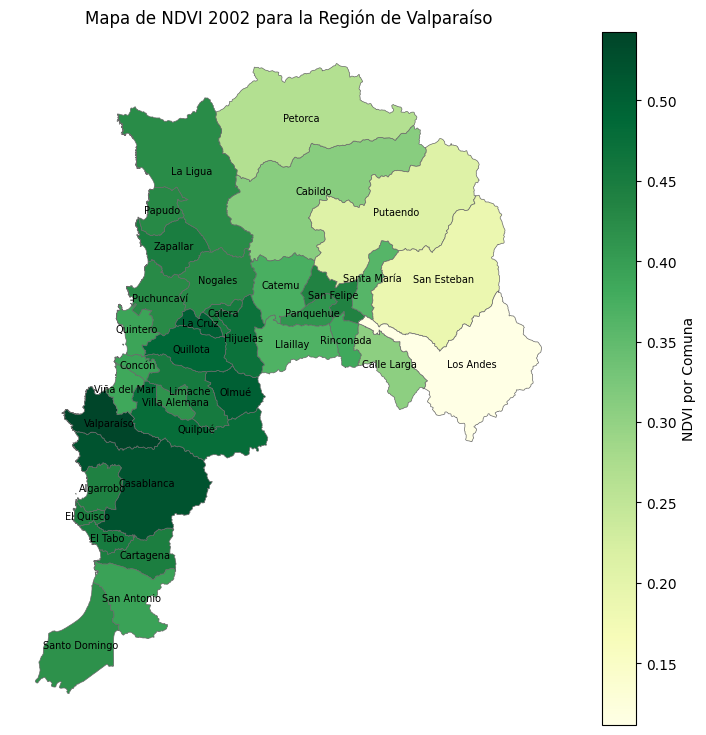

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))  # Aumentar más el tamaño de la figura

df_summer_valparaiso_merged_2002.plot(column='2002_NDVI', ax=ax, legend=True,
              legend_kwds={'label': "NDVI por Comuna"},
              cmap='YlGn',  # Paleta de colores
              edgecolor='dimgray', linewidth=0.5)  # Agregar bordes negros a las comunas

for i, row in df_summer_valparaiso_merged_2002.iterrows():
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    label = f"{row['NOM_COM']}"  # Mostrar el nombre y el valor de NDVI
    ax.text(x, y, label, fontsize=7, ha='center', va='center', color='black', fontweight=550) 

#for i, row in df_summer_valparaiso_merged_2002.iterrows():
#    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
#    label = f"{row['NOM_COM']}: {row['2002_NDVI']:.2f}"  # Mostrar el nombre y el valor de NDVI
#    ax.text(x, y, label, fontsize=5.5, ha='center', va='center', color='black', fontweight=570) 

ax.set_axis_off()
plt.title('Mapa de NDVI 2002 para la Región de Valparaíso')
plt.show()

#### 2003

In [16]:
df_summer_valparaiso_merged_2003 = df_summer_valparaiso_merged.dropna(subset=['2003_NDVI'])
df_summer_valparaiso_merged_2003.loc[:, '2003_NDVI'] = df_summer_valparaiso_merged_2003['2003_NDVI'].fillna(0)

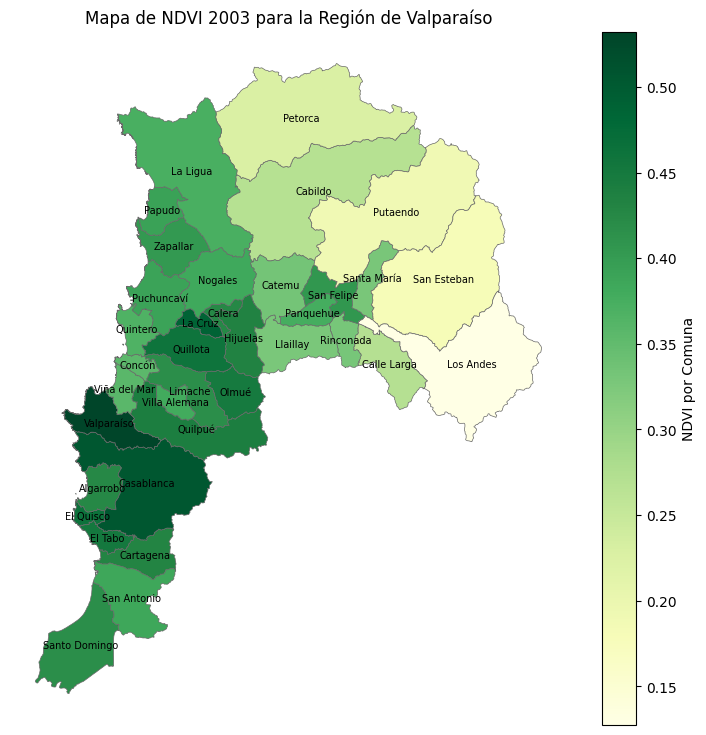

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))  # Aumentar más el tamaño de la figura

df_summer_valparaiso_merged_2003.plot(column='2003_NDVI', ax=ax, legend=True,
              legend_kwds={'label': "NDVI por Comuna"},
              cmap='YlGn',  # Paleta de colores
              edgecolor='dimgray', linewidth=0.5)  # Agregar bordes negros a las comunas

for i, row in df_summer_valparaiso_merged_2003.iterrows():
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    label = f"{row['NOM_COM']}"  # Mostrar el nombre y el valor de NDVI
    ax.text(x, y, label, fontsize=7, ha='center', va='center', color='black', fontweight=550) 

ax.set_axis_off()
plt.title('Mapa de NDVI 2003 para la Región de Valparaíso')
plt.show()

#### 2004

In [18]:
df_summer_valparaiso_merged_2004 = df_summer_valparaiso_merged.dropna(subset=['2004_NDVI'])
df_summer_valparaiso_merged_2004.loc[:, '2004_NDVI'] = df_summer_valparaiso_merged_2004['2004_NDVI'].fillna(0)

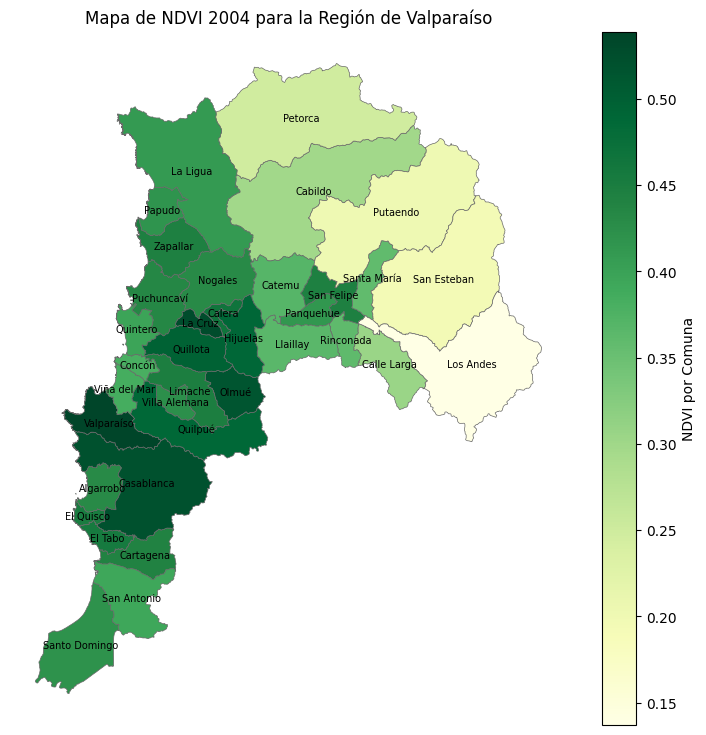

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))  # Aumentar más el tamaño de la figura

df_summer_valparaiso_merged_2004.plot(column='2004_NDVI', ax=ax, legend=True,
              legend_kwds={'label': "NDVI por Comuna"},
              cmap='YlGn',  # Paleta de colores
              edgecolor='dimgray', linewidth=0.5)  # Agregar bordes negros a las comunas

for i, row in df_summer_valparaiso_merged_2004.iterrows():
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    label = f"{row['NOM_COM']}"  # Mostrar el nombre y el valor de NDVI
    ax.text(x, y, label, fontsize=7, ha='center', va='center', color='black', fontweight=550) 

ax.set_axis_off()
plt.title('Mapa de NDVI 2004 para la Región de Valparaíso')
plt.show()

#### 2005

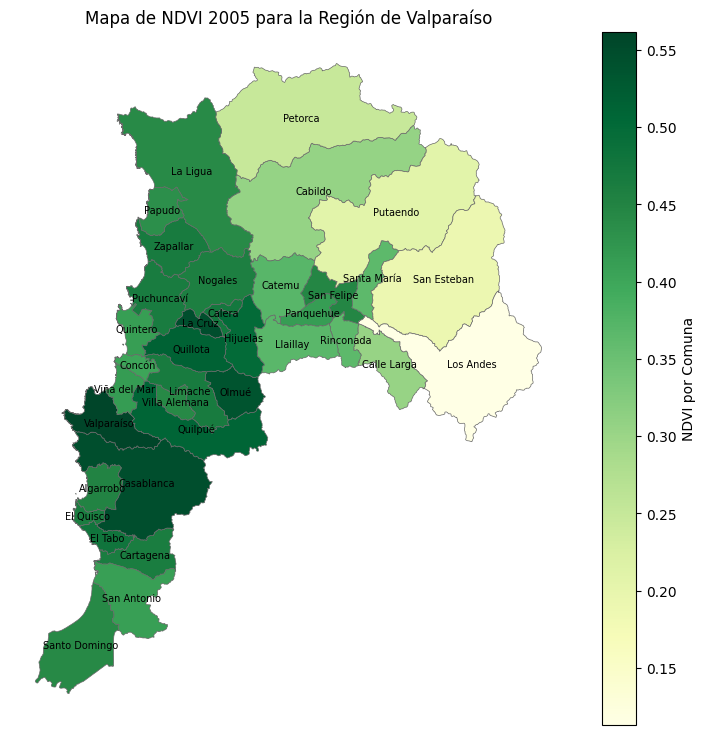

In [21]:
df_summer_valparaiso_merged_2005 = df_summer_valparaiso_merged.dropna(subset=['2005_NDVI'])
df_summer_valparaiso_merged_2005.loc[:, '2005_NDVI'] = df_summer_valparaiso_merged_2005['2005_NDVI'].fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(9, 9))  # Aumentar más el tamaño de la figura

df_summer_valparaiso_merged_2005.plot(column='2005_NDVI', ax=ax, legend=True,
              legend_kwds={'label': "NDVI por Comuna"},
              cmap='YlGn',  # Paleta de colores
              edgecolor='dimgray', linewidth=0.5)  # Agregar bordes negros a las comunas

for i, row in df_summer_valparaiso_merged_2005.iterrows():
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    label = f"{row['NOM_COM']}"  # Mostrar el nombre y el valor de NDVI
    ax.text(x, y, label, fontsize=7, ha='center', va='center', color='black', fontweight=550) 

ax.set_axis_off()
plt.title('Mapa de NDVI 2005 para la Región de Valparaíso')
plt.show()

#### 2006

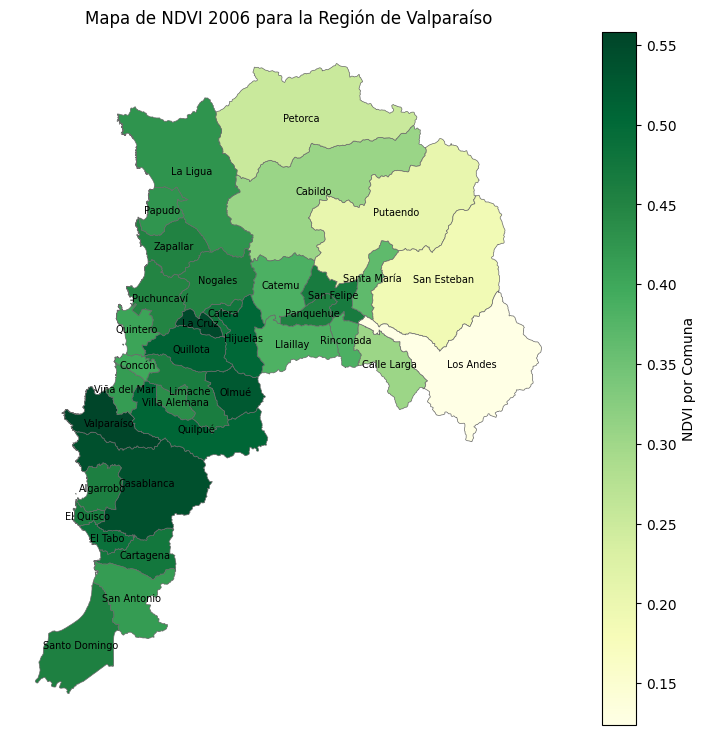

In [22]:
df_summer_valparaiso_merged_2006 = df_summer_valparaiso_merged.dropna(subset=['2006_NDVI'])
df_summer_valparaiso_merged_2006.loc[:, '2006_NDVI'] = df_summer_valparaiso_merged_2005['2006_NDVI'].fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(9, 9))  # Aumentar más el tamaño de la figura

df_summer_valparaiso_merged_2006.plot(column='2006_NDVI', ax=ax, legend=True,
              legend_kwds={'label': "NDVI por Comuna"},
              cmap='YlGn',  # Paleta de colores
              edgecolor='dimgray', linewidth=0.5)  # Agregar bordes negros a las comunas

for i, row in df_summer_valparaiso_merged_2006.iterrows():
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    label = f"{row['NOM_COM']}"  # Mostrar el nombre y el valor de NDVI
    ax.text(x, y, label, fontsize=7, ha='center', va='center', color='black', fontweight=550) 

ax.set_axis_off()
plt.title('Mapa de NDVI 2006 para la Región de Valparaíso')
plt.show()

#### 2007

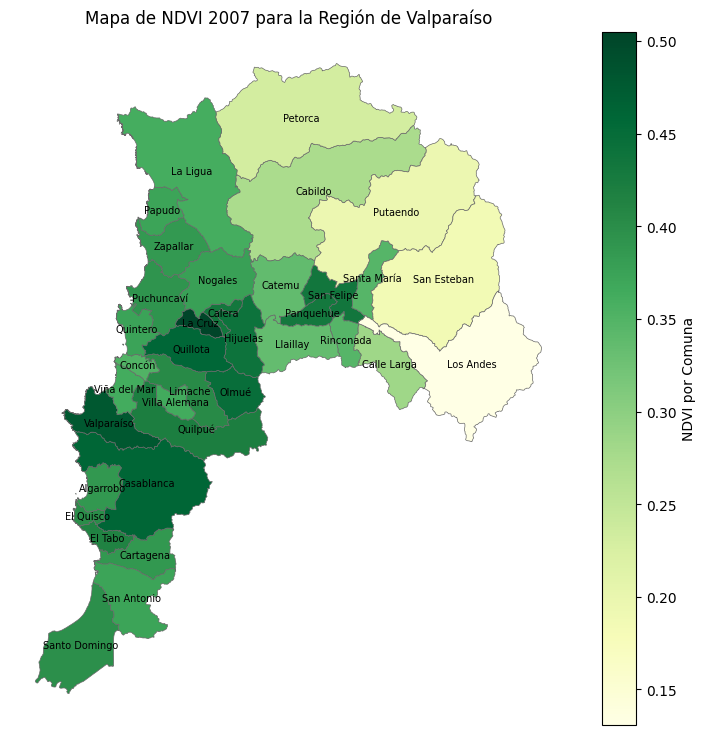

In [23]:
# Preparar el DataFrame para 2007
df_summer_valparaiso_merged_2007 = df_summer_valparaiso_merged.dropna(subset=['2007_NDVI'])
df_summer_valparaiso_merged_2007.loc[:, '2007_NDVI'] = df_summer_valparaiso_merged_2007['2007_NDVI'].fillna(0)

# Crear la figura
fig, ax = plt.subplots(1, 1, figsize=(9, 9))

# Crear el mapa para 2007
df_summer_valparaiso_merged_2007.plot(column='2007_NDVI', ax=ax, legend=True,
              legend_kwds={'label': "NDVI por Comuna"},
              cmap='YlGn',  # Paleta de colores
              edgecolor='dimgray', linewidth=0.5)  # Bordes negros en las comunas

# Añadir etiquetas con el nombre de la comuna
for i, row in df_summer_valparaiso_merged_2007.iterrows():
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    label = f"{row['NOM_COM']}"  # Mostrar nombre de la comuna
    ax.text(x, y, label, fontsize=7, ha='center', va='center', color='black', fontweight=550)

# Configurar y mostrar título
ax.set_axis_off()
plt.title('Mapa de NDVI 2007 para la Región de Valparaíso')
plt.show()


#### 2008

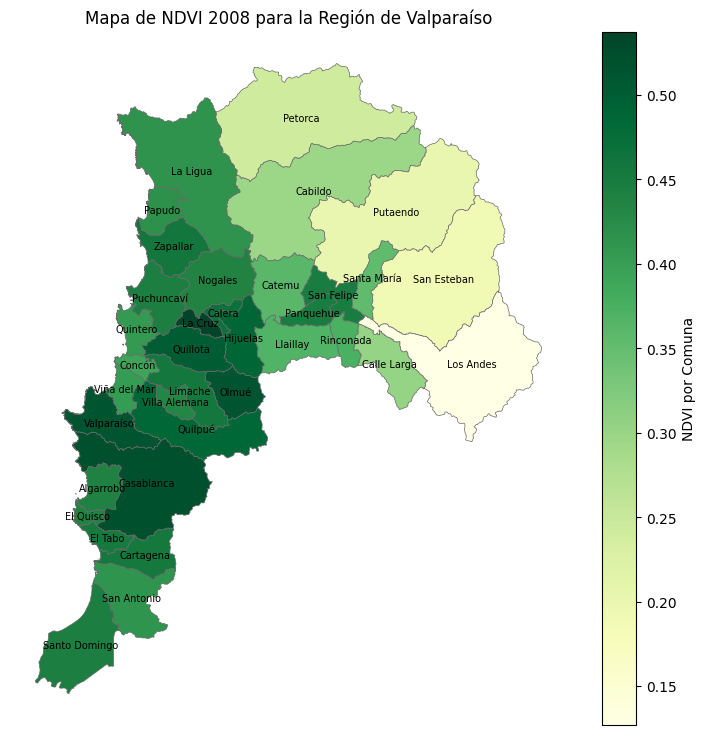

In [24]:
# Preparar el DataFrame para 2008
df_summer_valparaiso_merged_2008 = df_summer_valparaiso_merged.dropna(subset=['2008_NDVI'])
df_summer_valparaiso_merged_2008.loc[:, '2008_NDVI'] = df_summer_valparaiso_merged_2008['2008_NDVI'].fillna(0)

# Crear la figura
fig, ax = plt.subplots(1, 1, figsize=(9, 9))

# Crear el mapa para 2008
df_summer_valparaiso_merged_2008.plot(column='2008_NDVI', ax=ax, legend=True,
              legend_kwds={'label': "NDVI por Comuna"},
              cmap='YlGn',  # Paleta de colores
              edgecolor='dimgray', linewidth=0.5)  # Bordes negros en las comunas

# Añadir etiquetas con el nombre de la comuna
for i, row in df_summer_valparaiso_merged_2008.iterrows():
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    label = f"{row['NOM_COM']}"  # Mostrar nombre de la comuna
    ax.text(x, y, label, fontsize=7, ha='center', va='center', color='black', fontweight=550)

# Configurar y mostrar título
ax.set_axis_off()
plt.title('Mapa de NDVI 2008 para la Región de Valparaíso')
plt.show()



#### 2009

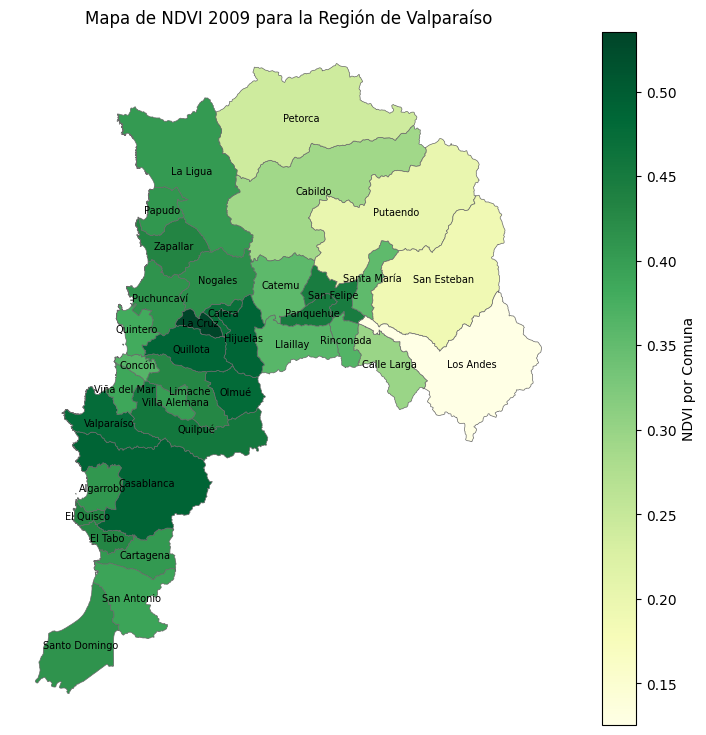

In [25]:
# Preparar el DataFrame para 2009
df_summer_valparaiso_merged_2009 = df_summer_valparaiso_merged.dropna(subset=['2009_NDVI'])
df_summer_valparaiso_merged_2009.loc[:, '2009_NDVI'] = df_summer_valparaiso_merged_2009['2009_NDVI'].fillna(0)

# Crear la figura
fig, ax = plt.subplots(1, 1, figsize=(9, 9))

# Crear el mapa para 2009
df_summer_valparaiso_merged_2009.plot(column='2009_NDVI', ax=ax, legend=True,
              legend_kwds={'label': "NDVI por Comuna"},
              cmap='YlGn',  # Paleta de colores
              edgecolor='dimgray', linewidth=0.5)  # Bordes negros en las comunas

# Añadir etiquetas con el nombre de la comuna
for i, row in df_summer_valparaiso_merged_2009.iterrows():
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    label = f"{row['NOM_COM']}"  # Mostrar nombre de la comuna
    ax.text(x, y, label, fontsize=7, ha='center', va='center', color='black', fontweight=550)

# Configurar y mostrar título
ax.set_axis_off()
plt.title('Mapa de NDVI 2009 para la Región de Valparaíso')
plt.show()



#### 2010

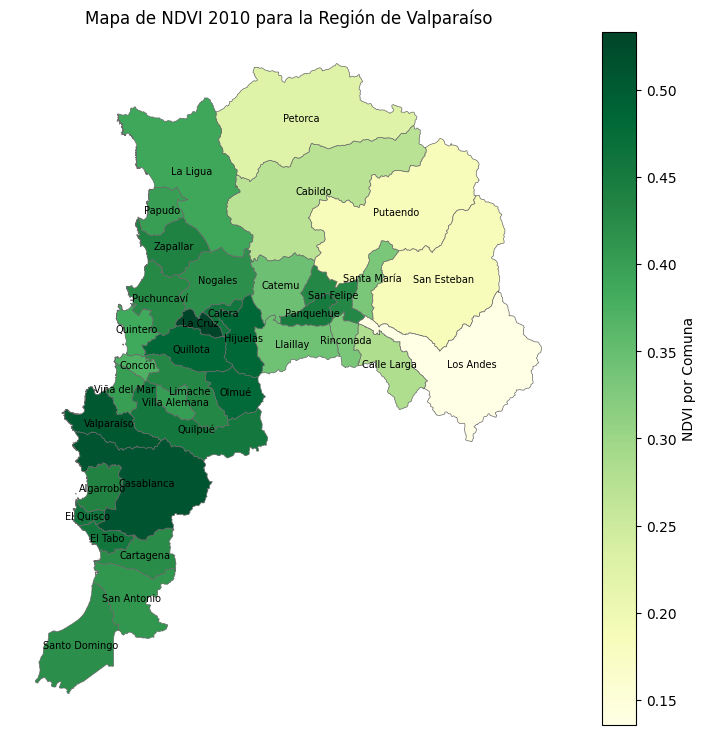

In [26]:
# Preparar el DataFrame para 2010
df_summer_valparaiso_merged_2010 = df_summer_valparaiso_merged.dropna(subset=['2010_NDVI'])
df_summer_valparaiso_merged_2010.loc[:, '2010_NDVI'] = df_summer_valparaiso_merged_2010['2010_NDVI'].fillna(0)

# Crear la figura
fig, ax = plt.subplots(1, 1, figsize=(9, 9))

# Crear el mapa para 2010
df_summer_valparaiso_merged_2010.plot(column='2010_NDVI', ax=ax, legend=True,
              legend_kwds={'label': "NDVI por Comuna"},
              cmap='YlGn',  # Paleta de colores
              edgecolor='dimgray', linewidth=0.5)  # Bordes negros en las comunas

# Añadir etiquetas con el nombre de la comuna
for i, row in df_summer_valparaiso_merged_2010.iterrows():
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    label = f"{row['NOM_COM']}"  # Mostrar nombre de la comuna
    ax.text(x, y, label, fontsize=7, ha='center', va='center', color='black', fontweight=550)

# Configurar y mostrar título
ax.set_axis_off()
plt.title('Mapa de NDVI 2010 para la Región de Valparaíso')
plt.show()

#### 2011

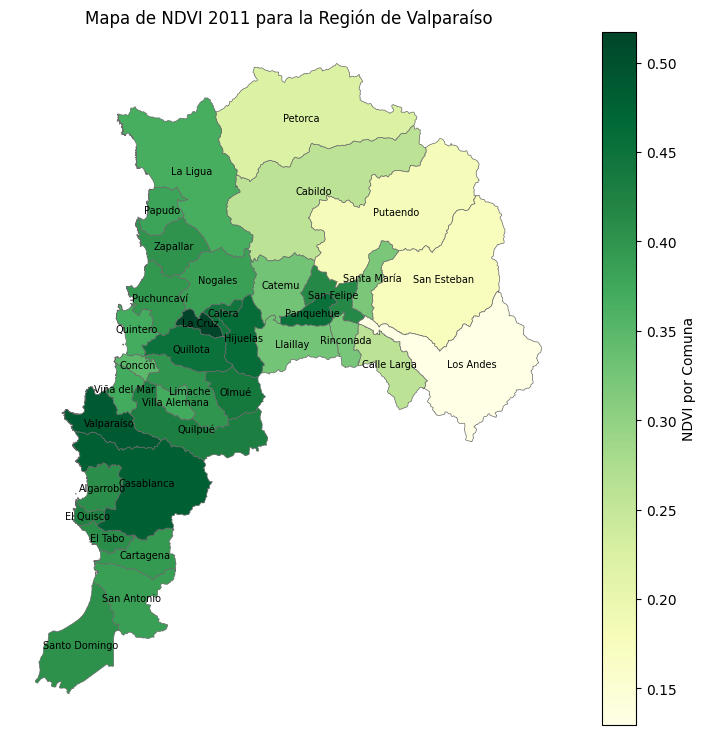

In [27]:
# Preparar el DataFrame para 2011
df_summer_valparaiso_merged_2011 = df_summer_valparaiso_merged.dropna(subset=['2011_NDVI'])
df_summer_valparaiso_merged_2011.loc[:, '2011_NDVI'] = df_summer_valparaiso_merged_2011['2011_NDVI'].fillna(0)

# Crear la figura
fig, ax = plt.subplots(1, 1, figsize=(9, 9))

# Crear el mapa para 2011
df_summer_valparaiso_merged_2011.plot(column='2011_NDVI', ax=ax, legend=True,
              legend_kwds={'label': "NDVI por Comuna"},
              cmap='YlGn',  # Paleta de colores
              edgecolor='dimgray', linewidth=0.5)  # Bordes negros en las comunas

# Añadir etiquetas con el nombre de la comuna
for i, row in df_summer_valparaiso_merged_2011.iterrows():
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    label = f"{row['NOM_COM']}"  # Mostrar nombre de la comuna
    ax.text(x, y, label, fontsize=7, ha='center', va='center', color='black', fontweight=550)

# Configurar y mostrar título
ax.set_axis_off()
plt.title('Mapa de NDVI 2011 para la Región de Valparaíso')
plt.show()

#### 2012

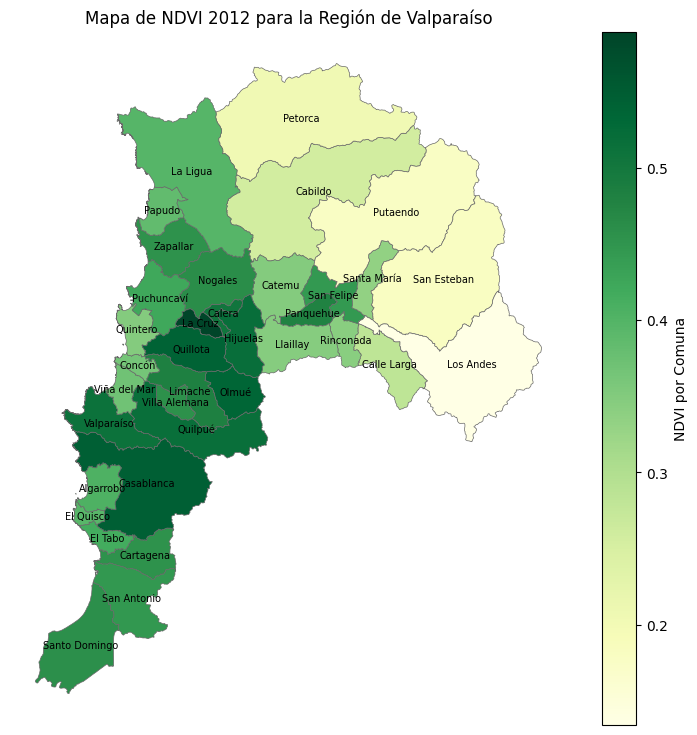

In [29]:
# Preparar el DataFrame para 2012
df_summer_valparaiso_merged_2012 = df_summer_valparaiso_merged.dropna(subset=['2012_NDVI'])
df_summer_valparaiso_merged_2012.loc[:, '2012_NDVI'] = df_summer_valparaiso_merged_2012['2012_NDVI'].fillna(0)

# Crear la figura
fig, ax = plt.subplots(1, 1, figsize=(9, 9))

# Crear el mapa para 2012
df_summer_valparaiso_merged_2012.plot(column='2012_NDVI', ax=ax, legend=True,
              legend_kwds={'label': "NDVI por Comuna"},
              cmap='YlGn',  # Paleta de colores
              edgecolor='dimgray', linewidth=0.5)  # Bordes negros en las comunas

# Añadir etiquetas con el nombre de la comuna
for i, row in df_summer_valparaiso_merged_2012.iterrows():
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    label = f"{row['NOM_COM']}"  # Mostrar nombre de la comuna
    ax.text(x, y, label, fontsize=7, ha='center', va='center', color='black', fontweight=550)

# Configurar y mostrar título
ax.set_axis_off()
plt.title('Mapa de NDVI 2012 para la Región de Valparaíso')
plt.show()

#### 2013

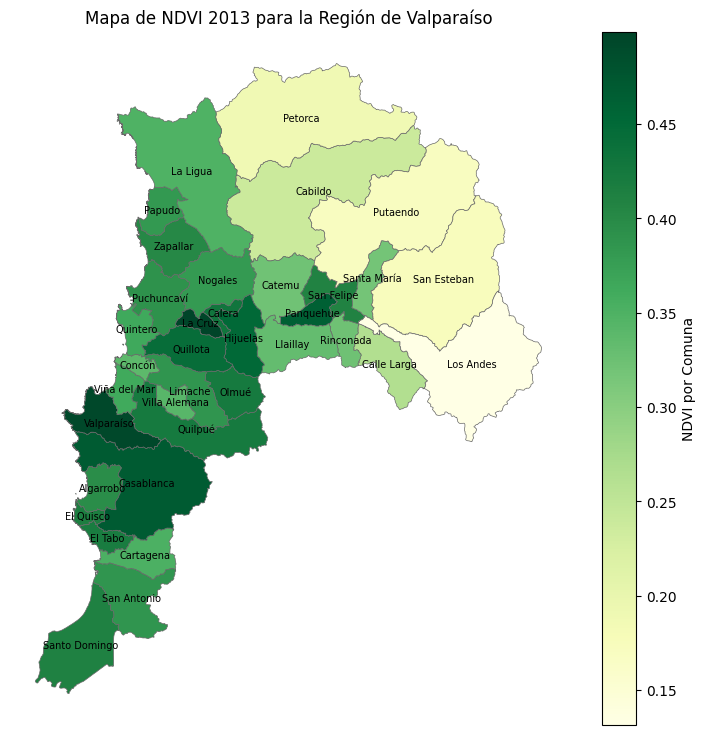

In [28]:
# Preparar el DataFrame para 2013
df_summer_valparaiso_merged_2013 = df_summer_valparaiso_merged.dropna(subset=['2013_NDVI'])
df_summer_valparaiso_merged_2013.loc[:, '2013_NDVI'] = df_summer_valparaiso_merged_2013['2013_NDVI'].fillna(0)

# Crear la figura
fig, ax = plt.subplots(1, 1, figsize=(9, 9))

# Crear el mapa para 2013
df_summer_valparaiso_merged_2013.plot(column='2013_NDVI', ax=ax, legend=True,
              legend_kwds={'label': "NDVI por Comuna"},
              cmap='YlGn',  # Paleta de colores
              edgecolor='dimgray', linewidth=0.5)  # Bordes negros en las comunas

# Añadir etiquetas con el nombre de la comuna
for i, row in df_summer_valparaiso_merged_2013.iterrows():
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    label = f"{row['NOM_COM']}"  # Mostrar nombre de la comuna
    ax.text(x, y, label, fontsize=7, ha='center', va='center', color='black', fontweight=550)

# Configurar y mostrar título
ax.set_axis_off()
plt.title('Mapa de NDVI 2013 para la Región de Valparaíso')
plt.show()

#### 2014

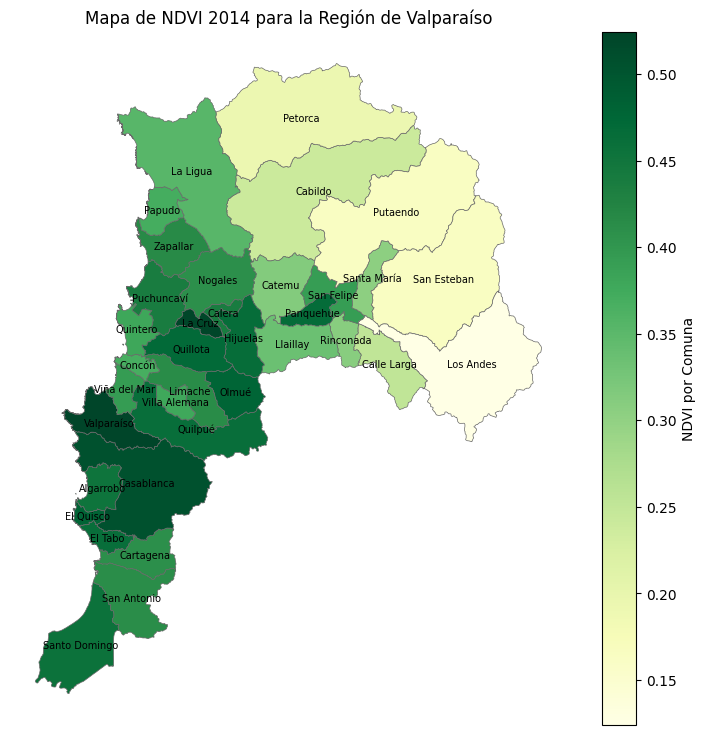

In [30]:
# Preparar el DataFrame para 2014
df_summer_valparaiso_merged_2014 = df_summer_valparaiso_merged.dropna(subset=['2014_NDVI'])
df_summer_valparaiso_merged_2014.loc[:, '2014_NDVI'] = df_summer_valparaiso_merged_2014['2014_NDVI'].fillna(0)

# Crear la figura
fig, ax = plt.subplots(1, 1, figsize=(9, 9))

# Crear el mapa para 2014
df_summer_valparaiso_merged_2014.plot(column='2014_NDVI', ax=ax, legend=True,
              legend_kwds={'label': "NDVI por Comuna"},
              cmap='YlGn',  # Paleta de colores
              edgecolor='dimgray', linewidth=0.5)  # Bordes negros en las comunas

# Añadir etiquetas con el nombre de la comuna
for i, row in df_summer_valparaiso_merged_2014.iterrows():
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    label = f"{row['NOM_COM']}"  # Mostrar nombre de la comuna
    ax.text(x, y, label, fontsize=7, ha='center', va='center', color='black', fontweight=550)

# Configurar y mostrar título
ax.set_axis_off()
plt.title('Mapa de NDVI 2014 para la Región de Valparaíso')
plt.show()

#### 2015

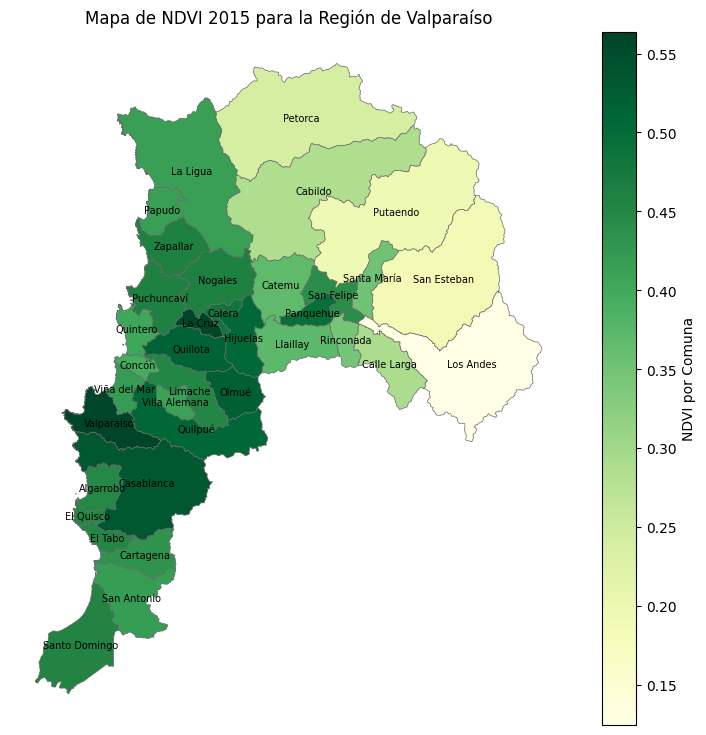

In [31]:
# Preparar el DataFrame para 2015
df_summer_valparaiso_merged_2015 = df_summer_valparaiso_merged.dropna(subset=['2015_NDVI'])
df_summer_valparaiso_merged_2015.loc[:, '2015_NDVI'] = df_summer_valparaiso_merged_2015['2015_NDVI'].fillna(0)

# Crear la figura
fig, ax = plt.subplots(1, 1, figsize=(9, 9))

# Crear el mapa para 2015
df_summer_valparaiso_merged_2015.plot(column='2015_NDVI', ax=ax, legend=True,
              legend_kwds={'label': "NDVI por Comuna"},
              cmap='YlGn',  # Paleta de colores
              edgecolor='dimgray', linewidth=0.5)  # Bordes negros en las comunas

# Añadir etiquetas con el nombre de la comuna
for i, row in df_summer_valparaiso_merged_2015.iterrows():
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    label = f"{row['NOM_COM']}"  # Mostrar nombre de la comuna
    ax.text(x, y, label, fontsize=7, ha='center', va='center', color='black', fontweight=550)

# Configurar y mostrar título
ax.set_axis_off()
plt.title('Mapa de NDVI 2015 para la Región de Valparaíso')
plt.show()

#### 2016

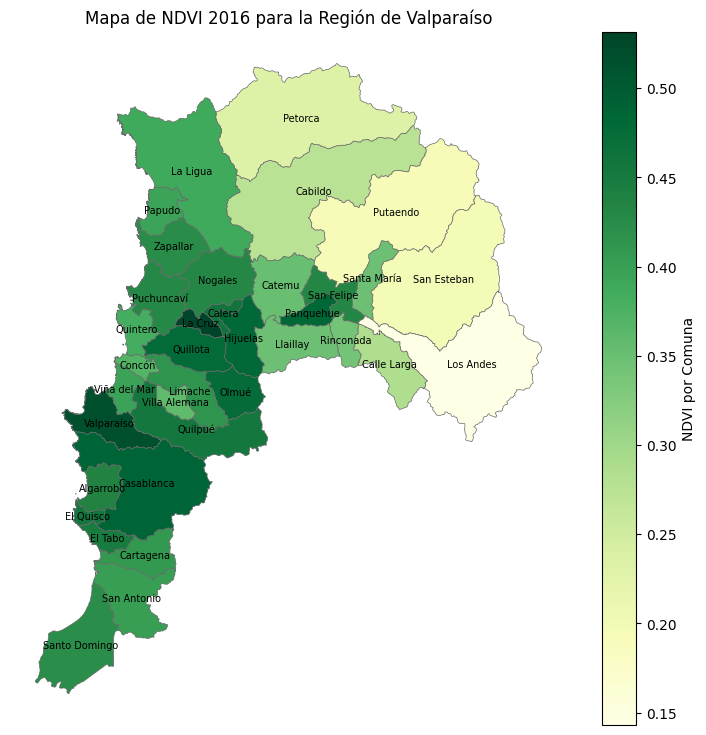

In [32]:
# Preparar el DataFrame para 2016
df_summer_valparaiso_merged_2016 = df_summer_valparaiso_merged.dropna(subset=['2016_NDVI'])
df_summer_valparaiso_merged_2016.loc[:, '2016_NDVI'] = df_summer_valparaiso_merged_2016['2016_NDVI'].fillna(0)

# Crear la figura
fig, ax = plt.subplots(1, 1, figsize=(9, 9))

# Crear el mapa para 2016
df_summer_valparaiso_merged_2016.plot(column='2016_NDVI', ax=ax, legend=True,
              legend_kwds={'label': "NDVI por Comuna"},
              cmap='YlGn',  # Paleta de colores
              edgecolor='dimgray', linewidth=0.5)  # Bordes negros en las comunas

# Añadir etiquetas con el nombre de la comuna
for i, row in df_summer_valparaiso_merged_2016.iterrows():
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    label = f"{row['NOM_COM']}"  # Mostrar nombre de la comuna
    ax.text(x, y, label, fontsize=7, ha='center', va='center', color='black', fontweight=550)

# Configurar y mostrar título
ax.set_axis_off()
plt.title('Mapa de NDVI 2016 para la Región de Valparaíso')
plt.show()

#### 2017

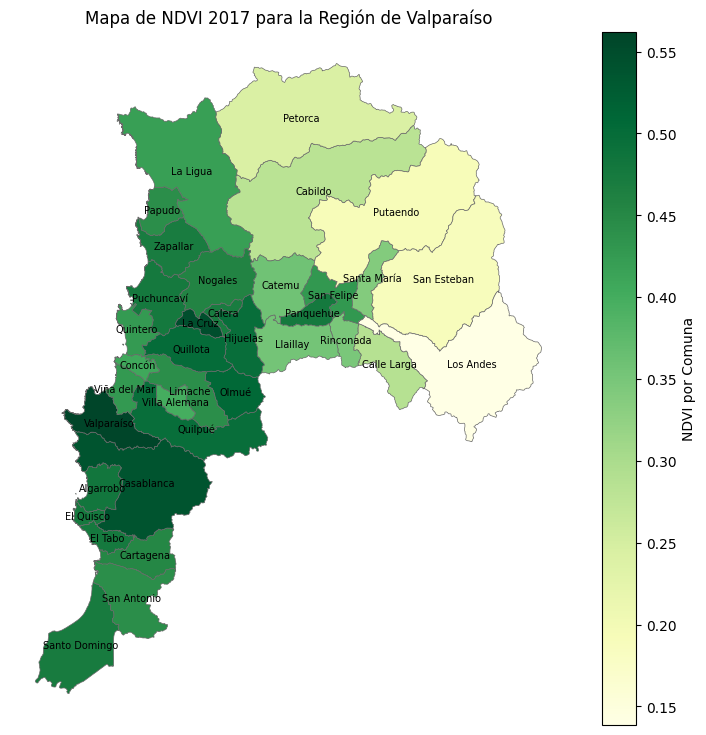

In [33]:
# Preparar el DataFrame para 2017
df_summer_valparaiso_merged_2017 = df_summer_valparaiso_merged.dropna(subset=['2017_NDVI'])
df_summer_valparaiso_merged_2017.loc[:, '2017_NDVI'] = df_summer_valparaiso_merged_2017['2017_NDVI'].fillna(0)

# Crear la figura
fig, ax = plt.subplots(1, 1, figsize=(9, 9))

# Crear el mapa para 2017
df_summer_valparaiso_merged_2017.plot(column='2017_NDVI', ax=ax, legend=True,
              legend_kwds={'label': "NDVI por Comuna"},
              cmap='YlGn',  # Paleta de colores
              edgecolor='dimgray', linewidth=0.5)  # Bordes negros en las comunas

# Añadir etiquetas con el nombre de la comuna
for i, row in df_summer_valparaiso_merged_2017.iterrows():
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    label = f"{row['NOM_COM']}"  # Mostrar nombre de la comuna
    ax.text(x, y, label, fontsize=7, ha='center', va='center', color='black', fontweight=550)

# Configurar y mostrar título
ax.set_axis_off()
plt.title('Mapa de NDVI 2017 para la Región de Valparaíso')
plt.show()


#### 2018

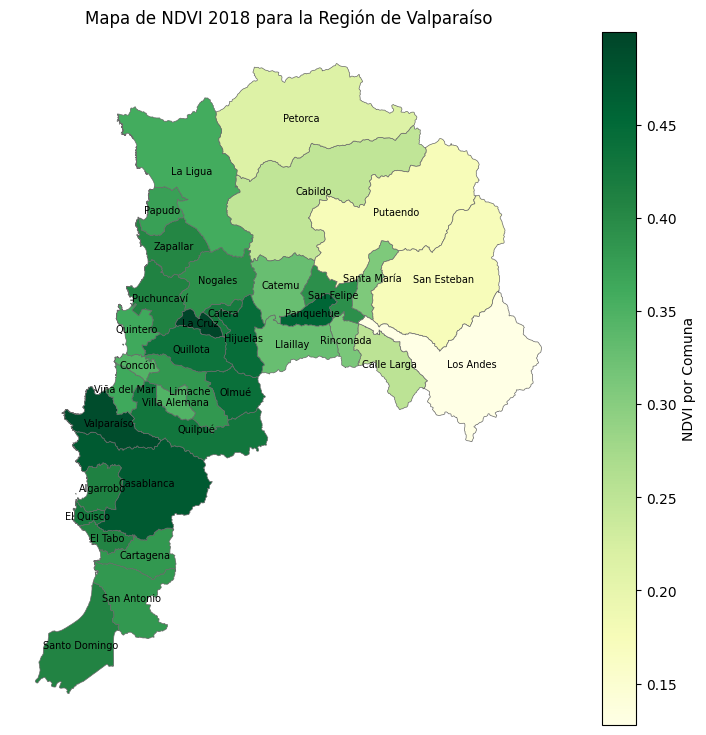

In [34]:
# Preparar el DataFrame para 2018
df_summer_valparaiso_merged_2018 = df_summer_valparaiso_merged.dropna(subset=['2018_NDVI'])
df_summer_valparaiso_merged_2018.loc[:, '2018_NDVI'] = df_summer_valparaiso_merged_2018['2018_NDVI'].fillna(0)

# Crear la figura
fig, ax = plt.subplots(1, 1, figsize=(9, 9))

# Crear el mapa para 2018
df_summer_valparaiso_merged_2018.plot(column='2018_NDVI', ax=ax, legend=True,
              legend_kwds={'label': "NDVI por Comuna"},
              cmap='YlGn',  # Paleta de colores
              edgecolor='dimgray', linewidth=0.5)  # Bordes negros en las comunas

# Añadir etiquetas con el nombre de la comuna
for i, row in df_summer_valparaiso_merged_2018.iterrows():
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    label = f"{row['NOM_COM']}"  # Mostrar nombre de la comuna
    ax.text(x, y, label, fontsize=7, ha='center', va='center', color='black', fontweight=550)

# Configurar y mostrar título
ax.set_axis_off()
plt.title('Mapa de NDVI 2018 para la Región de Valparaíso')
plt.show()


#### 2019

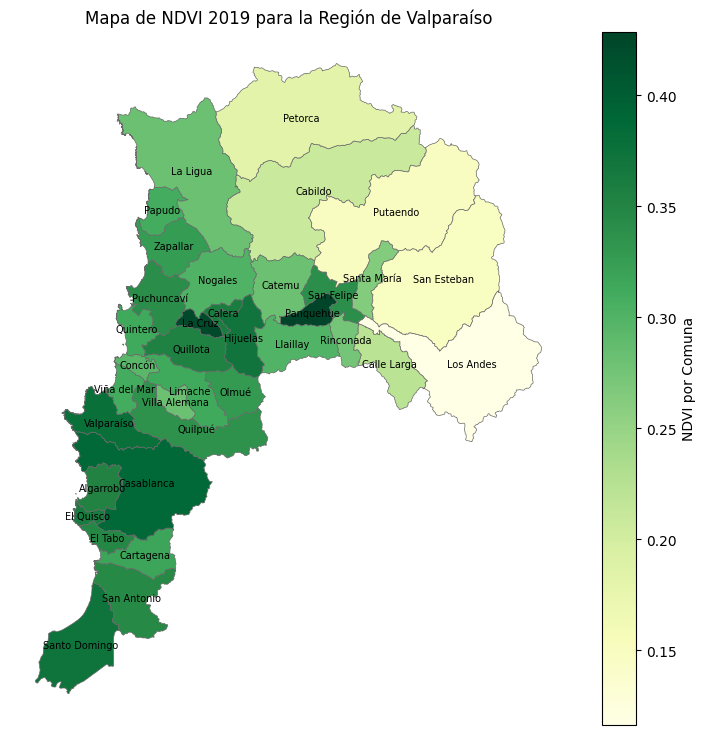

In [35]:
# Preparar el DataFrame para 2019
df_summer_valparaiso_merged_2019 = df_summer_valparaiso_merged.dropna(subset=['2019_NDVI'])
df_summer_valparaiso_merged_2019.loc[:, '2019_NDVI'] = df_summer_valparaiso_merged_2019['2019_NDVI'].fillna(0)

# Crear la figura
fig, ax = plt.subplots(1, 1, figsize=(9, 9))

# Crear el mapa para 2019
df_summer_valparaiso_merged_2019.plot(column='2019_NDVI', ax=ax, legend=True,
              legend_kwds={'label': "NDVI por Comuna"},
              cmap='YlGn',  # Paleta de colores
              edgecolor='dimgray', linewidth=0.5)  # Bordes negros en las comunas

# Añadir etiquetas con el nombre de la comuna
for i, row in df_summer_valparaiso_merged_2019.iterrows():
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    label = f"{row['NOM_COM']}"  # Mostrar nombre de la comuna
    ax.text(x, y, label, fontsize=7, ha='center', va='center', color='black', fontweight=550)

# Configurar y mostrar título
ax.set_axis_off()
plt.title('Mapa de NDVI 2019 para la Región de Valparaíso')
plt.show()


#### 2020

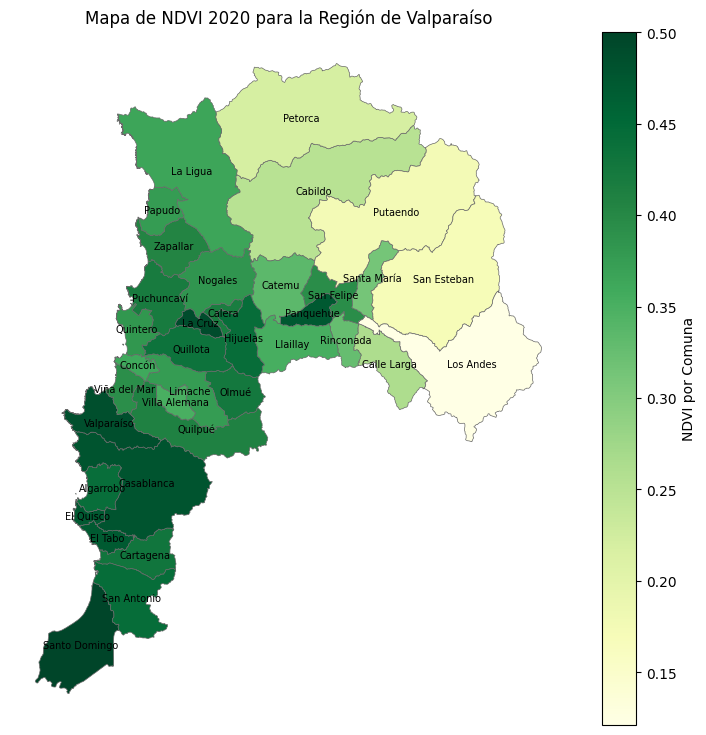

In [37]:
# Preparar el DataFrame para 2020
df_summer_valparaiso_merged_2020 = df_summer_valparaiso_merged.dropna(subset=['2020_NDVI'])
df_summer_valparaiso_merged_2020.loc[:, '2020_NDVI'] = df_summer_valparaiso_merged_2020['2020_NDVI'].fillna(0)

# Crear la figura
fig, ax = plt.subplots(1, 1, figsize=(9, 9))

# Crear el mapa para 2020
df_summer_valparaiso_merged_2020.plot(column='2020_NDVI', ax=ax, legend=True,
              legend_kwds={'label': "NDVI por Comuna"},
              cmap='YlGn',  # Paleta de colores
              edgecolor='dimgray', linewidth=0.5)  # Bordes negros en las comunas

# Añadir etiquetas con el nombre de la comuna
for i, row in df_summer_valparaiso_merged_2020.iterrows():
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    label = f"{row['NOM_COM']}"  # Mostrar nombre de la comuna
    ax.text(x, y, label, fontsize=7, ha='center', va='center', color='black', fontweight=550)

# Configurar y mostrar título
ax.set_axis_off()
plt.title('Mapa de NDVI 2020 para la Región de Valparaíso')
plt.show()


#### 2021

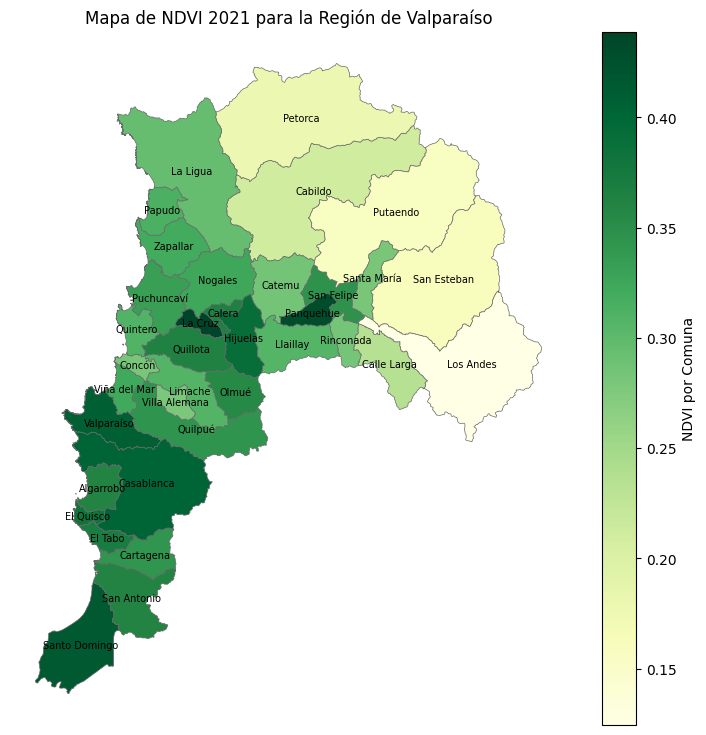

In [38]:
# Preparar el DataFrame para 2021
df_summer_valparaiso_merged_2021 = df_summer_valparaiso_merged.dropna(subset=['2021_NDVI'])
df_summer_valparaiso_merged_2021.loc[:, '2021_NDVI'] = df_summer_valparaiso_merged_2021['2021_NDVI'].fillna(0)

# Crear la figura
fig, ax = plt.subplots(1, 1, figsize=(9, 9))

# Crear el mapa para 2021
df_summer_valparaiso_merged_2021.plot(column='2021_NDVI', ax=ax, legend=True,
              legend_kwds={'label': "NDVI por Comuna"},
              cmap='YlGn',  # Paleta de colores
              edgecolor='dimgray', linewidth=0.5)  # Bordes negros en las comunas

# Añadir etiquetas con el nombre de la comuna
for i, row in df_summer_valparaiso_merged_2021.iterrows():
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    label = f"{row['NOM_COM']}"  # Mostrar nombre de la comuna
    ax.text(x, y, label, fontsize=7, ha='center', va='center', color='black', fontweight=550)

# Configurar y mostrar título
ax.set_axis_off()
plt.title('Mapa de NDVI 2021 para la Región de Valparaíso')
plt.show()


#### 2022

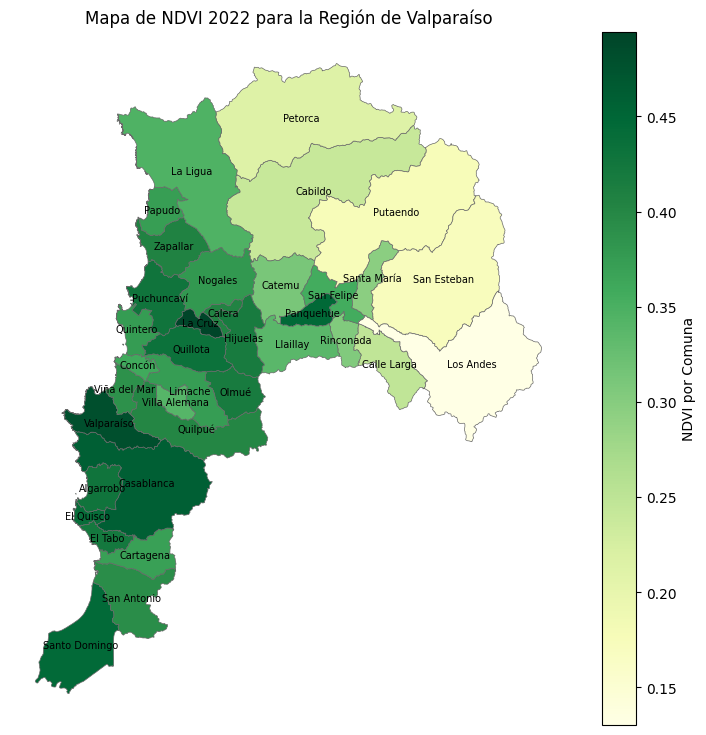

In [39]:
# Preparar el DataFrame para 2022
df_summer_valparaiso_merged_2022 = df_summer_valparaiso_merged.dropna(subset=['2022_NDVI'])
df_summer_valparaiso_merged_2022.loc[:, '2022_NDVI'] = df_summer_valparaiso_merged_2022['2022_NDVI'].fillna(0)

# Crear la figura
fig, ax = plt.subplots(1, 1, figsize=(9, 9))

# Crear el mapa para 2022
df_summer_valparaiso_merged_2022.plot(column='2022_NDVI', ax=ax, legend=True,
              legend_kwds={'label': "NDVI por Comuna"},
              cmap='YlGn',  # Paleta de colores
              edgecolor='dimgray', linewidth=0.5)  # Bordes negros en las comunas

# Añadir etiquetas con el nombre de la comuna
for i, row in df_summer_valparaiso_merged_2022.iterrows():
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    label = f"{row['NOM_COM']}"  # Mostrar nombre de la comuna
    ax.text(x, y, label, fontsize=7, ha='center', va='center', color='black', fontweight=550)

# Configurar y mostrar título
ax.set_axis_off()
plt.title('Mapa de NDVI 2022 para la Región de Valparaíso')
plt.show()


### Invierno

## Promedio de NDVI entre 2002-2022 por cada comuna de Valparaíso 

In [36]:
# Calcular el promedio entre todas las columnas NDVI para cada fila
# Usamos columnas_ndvi = [col for col in df_summer.columns if '_NDVI' in col] que importamos más arriba
df_summer_valparaiso = df_summer.loc[df_summer["NOM_REG"] == "Valparaíso"].copy()  # Usar .copy() para asegurar que estás trabajando con una copia independiente
df_winter_valparaiso = df_winter.loc[df_winter["NOM_REG"] == "Valparaíso"].copy()  # Lo mismo para el df_winter
# Mostrar los resultados
print("Promedio NDVI por comuna Summer (2002-2022):")
print(df_summer_valparaiso[['NOM_COM', 'Mean_NDVI']])
print("\nPromedio NDVI por comuna Winter (2002-2022):")
print(df_winter_valparaiso[['NOM_COM', 'Mean_NDVI']])

Promedio NDVI por comuna Summer (2002-2022):


KeyError: "['Mean_NDVI'] not in index"